## Data Science Analysis

## Classifiers

<hr>

In [2]:


import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve (area = '+str(round(auc, 3))+')')
    plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show()
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1 * (pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return (pd.DataFrame({'threshold':[thresh],
                          'fpr':[fpr],
                          'tpr':[tpr]}))
                          

## Case Study: Understanding NBA Longevity

We will look at data collected on rookies in the NBA from 1980-2016 to determine if the rookies are successful and still playing in the NBA after 5 years.  The available variables include the following **per game** statistics:

- **GP**: number of games played
- **MIN**: number of minutes played per game
- **PTS**: number of points scored per game
- **FGM**: number of field goals made per game
- **FGA**: number of field goals attempted per game
- **FG%**: percentage of field goals made per game
- **3P Made**: number of 3-point field goals made per game
- **3PA**: number of 3-point field goals attempted per game
- **3P%**: percentage of 3-point field goals made per game
- **FTM**: number of free throws made per game
- **FTA**: number of free throws attempted per game
- **FT%**: percentage of free throws made per game
- **OREB**: number of offensive rebounds per game
- **DREB**: number of defensive rebounds per game
- **REB**: total number of rebounds per game
- **AST**: number of assists per game
- **STL**: number of steals per game
- **BLK**: number of blocks per game
- **TOV**: number of turnovers per game
- **TARGET_5Yrs**: whether the player is still playing in the NBA after 5 years (1 = playing, 0 = not playing)

The code cell below will read in the data for you.  Be sure to run the cell. 

In [3]:
df = pd.read_csv('nba_rookie.csv')
df

,Name,GP,MIN,PTS,FGM,FGA,FG_Perc,3P Made,3PA,3P_Perc,...,FTA,FT_Perc,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1305,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1306,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1307,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


### 1. [5 points] Fit a Classifier


**a)** Fit a model predicting whether the player lasts 5 years or more in the NBA from four of the other variables in the data.  

In [4]:
import statsmodels.formula.api as smf
model= smf.logit("TARGET_5Yrs ~ PTS + AST + REB + FG_Perc", data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.574394
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1304
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Nov 2025   Pseudo R-squ.:                  0.1287
Time:                        11:34:16   Log-Likelihood:                -751.88
converged:                       True   LL-Null:                       -862.93
Covariance Type:            nonrobust   LLR p-value:                 6.644e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0763      0.495     -6.209      0.000      -4.047      -2.105
PTS            0.1014      0.031      3.298      0.001       0.041       0.162
AST            0.1921      0.068      2.816      0.005       0.058       0.326
REB            0.2104      0.056      3.728      0.000       0.100       0.321
FG_Perc        0.0485      0.012      4.122      0.000       0.025       0.072
==============================================================================
"""

**b)** Generated the predictive probabilities from my model

In [5]:
df["pred_prob"] = model.predict(df)
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG_Perc,3P Made,3PA,3P_Perc,...,FT_Perc,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,pred_prob
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,0.642075
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,0.575654
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,0.538066
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,0.530241
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,0.623625


**c)** Generated predictions for a classifier with a predictive probability threshold of 0.5.  Saved these predictions as a new column.

In [6]:
df['pred_class'] = (df['pred_prob'] >= 0.5).astype(int)
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG_Perc,3P Made,3PA,3P_Perc,...,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,pred_prob,pred_class
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,0.642075,1
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,0.575654,1
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,0.538066,1
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,0.530241,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,0.623625,1


**d)** Generated the confusion matrix for the classifier from part **c**.

In [7]:
confmatrix = pd.crosstab(df["TARGET_5Yrs"], df["pred_class"])
confmatrix

pred_class,0,1
TARGET_5Yrs,,
0,233,252
1,146,678


**e)** Calculated (and reported) the accuracy rate, sensitivity, and specificity for this classifier.

In [8]:
confmatrix = pd.crosstab(df["TARGET_5Yrs"], df["pred_class"])

# extract values
TN = confmatrix.loc[0, 0]
FP = confmatrix.loc[0, 1]
FN = confmatrix.loc[1, 0]
TP = confmatrix.loc[1, 1]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# print results
print("Accuracy:", round(accuracy, 3))
print("Sensitivity:", round(sensitivity, 3))
print("Specificity:", round(specificity, 3))

Accuracy: 0.696
Sensitivity: 0.823
Specificity: 0.48


### 2. [5 points] Prompt: Selecting a Better Threshold

We used the "default" predictive probability threshold of 0.5 in Question 1 above.  We should question if this is an ideal threshold and will therefore aim to select our threshold more systematically.

**a)** Suppose that we are part of the coaching staff for an NBA team, and we would like to recruit young players from other teams who we anticipate will still be playing after 5 years in the league.  We don't want to waste our time recruiting young players who will not still be playing in the NBA at the end of their contract.

What type of error would be worse for a classifier?  Therefore, what type of error should we reduce?  And would you anticipate that the predictive probability threshold would increase or decrease?

The worst type of error would be a false positive because that would mean we anticipate a player will continue playing for 5 years when they actually arent, thus wasting our time. 

**b)** Generate the ROC curve for the model from Question 1.

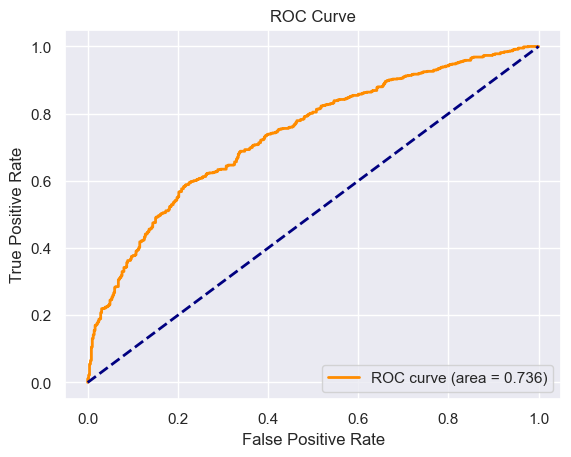

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_true = df["TARGET_5Yrs"], y_score = df["pred_prob"])
auc = roc_auc_score(y_true = df["TARGET_5Yrs"], y_score = df["pred_prob"])
plot_roc(fpr, tpr, auc)

**c)** Selected and identified the value for an "ideal" threshold using your ROC curve from **part b** and the errors to be minimized from **part a**.

In [17]:
for thresh in np.arange(0, 1.1, 0.1):
    print(fpr_tpr_thresh(df["TARGET_5Yrs"], df["pred_prob"], thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold  fpr  tpr
0        0.1  1.0  1.0
   threshold       fpr  tpr
0        0.2  0.995876  1.0
   threshold       fpr       tpr
0        0.3  0.942268  0.989078
   threshold       fpr       tpr
0        0.4  0.762887  0.925971
   threshold       fpr       tpr
0        0.5  0.519588  0.822816
   threshold       fpr       tpr
0        0.6  0.334021  0.671117
   threshold       fpr       tpr
0        0.7  0.179381  0.512136
   threshold       fpr       tpr
0        0.8  0.072165  0.313107
   threshold       fpr      tpr
0        0.9  0.014433  0.14199
   threshold  fpr  tpr
0        1.0  0.0  0.0


In [18]:
for thresh in np.arange(0.7, 0.9, 0.01):
    print(fpr_tpr_thresh(df["TARGET_5Yrs"], df["pred_prob"], thresh))

   threshold       fpr       tpr
0        0.7  0.179381  0.512136
   threshold       fpr       tpr
0       0.71  0.160825  0.496359
   threshold      fpr       tpr
0       0.72  0.14433  0.470874
   threshold       fpr       tpr
0       0.73  0.134021  0.446602
   threshold       fpr      tpr
0       0.74  0.119588  0.42233
   threshold       fpr       tpr
0       0.75  0.115464  0.401699
   threshold       fpr       tpr
0       0.76  0.107216  0.383495
   threshold       fpr       tpr
0       0.77  0.096907  0.370146
   threshold       fpr      tpr
0       0.78  0.086598  0.34466
   threshold       fpr       tpr
0       0.79  0.076289  0.326456
   threshold       fpr       tpr
0        0.8  0.072165  0.313107
   threshold       fpr       tpr
0       0.81  0.063918  0.285194
   threshold       fpr      tpr
0       0.82  0.059794  0.26699
   threshold       fpr       tpr
0       0.83  0.053608  0.248786
   threshold       fpr       tpr
0       0.84  0.045361  0.228155
   threshold      

**d)** The strength of the model when used as a classifier.

In [19]:
strength = roc_auc_score(y_true = df["TARGET_5Yrs"], y_score = df["pred_prob"])
strength

0.7363915023521168